# Previsão de valores de NPS por séries temporais
- Estratégia utilizando Prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [4]:
# Bibliotecas
!pip install openpyxl
!pip install prophet

import pandas as pd
from prophet import Prophet


import openpyxl

<AxesSubplot:xlabel='Mês'>

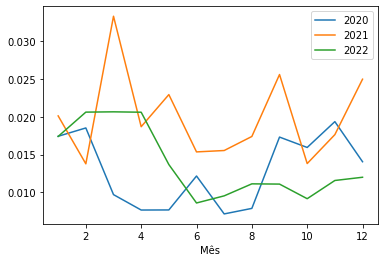

In [5]:
df0 = pd.read_csv('enps_base_prophet.csv',
                 sep=';', decimal=',')

df0.plot(x="Mês", y=["2020", "2021", "2022"], kind="line")

In [6]:
df = pd.read_csv('enps_pred.csv',
                 sep=';', decimal=',')
df.head()

,ds,y
0,31/01/2020,0.017417
1,28/02/2020,0.018519
2,31/03/2020,0.009695
3,30/04/2020,0.007657
4,31/05/2020,0.007669


In [7]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

14:39:01 - cmdstanpy - INFO - Chain [1] start processing
14:39:01 - cmdstanpy - INFO - Chain [1] done processing


,ds
42,2023-08-31
43,2023-09-30
44,2023-10-31
45,2023-11-30
46,2023-12-31


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
35,2023-01-31,0.018509,0.012520,0.024113
36,2023-02-28,0.018563,0.012900,0.024669
37,2023-03-31,0.023696,0.017880,0.029822
38,2023-04-30,0.020048,0.014222,0.025868
39,2023-05-31,0.014298,0.008219,0.020051
40,2023-06-30,0.005560,0.000320,0.011642
41,2023-07-31,0.014015,0.008679,0.020161
42,2023-08-31,0.019435,0.013276,0.025317
43,2023-09-30,0.017891,0.012180,0.023861
44,2023-10-31,0.012633,0.006707,0.018661


In [11]:
export = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
export.to_excel("output_prophet.xlsx")  

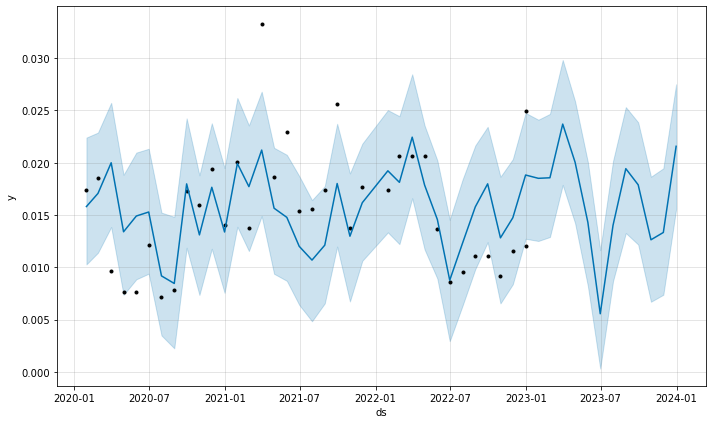

In [12]:
fig1 = m.plot(forecast)

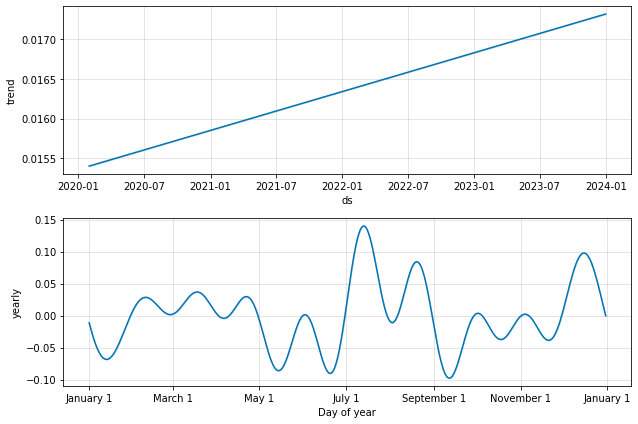

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly

#plot_plotly(m, forecast)
#plot_components_plotly(m, forecast)